## Introduction
This analysis stems from a survey conducted on the issues faced by different bank customers. The survey was filled by customers of different banks. With this analysis, we wish to derive insights from the different issues faced by the customers and also establish relationships and trends from the data.

## Preparing The Data and Other Requirements
The dataset to be used was extracted from data.world website and it will be the basis for our analysis. Firstly let's load the libraries required for our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The next thing is to load the dataset required for the analysis.

In [2]:
df = pd.read_csv('/kaggle/input/consumer-complaints-data/P9-ConsumerComplaints.csv')

/tmp/ipykernel_18/3785490344.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/consumer-complaints-data/P9-ConsumerComplaints.csv')


## About The Dataset
The code below will give us some information about the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date Received                 65499 non-null  object
 1   Product Name                  65499 non-null  object
 2   Sub Product                   46935 non-null  object
 3   Issue                         65499 non-null  object
 4   Sub Issue                     30658 non-null  object
 5   Consumer Complaint Narrative  2614 non-null   object
 6   Company Public Response       2450 non-null   object
 7   Company                       65499 non-null  object
 8   State Name                    65021 non-null  object
 9   Zip Code                      65021 non-null  object
 10  Tags                          9681 non-null   object
 11  Consumer Consent Provided     4760 non-null   object
 12  Submitted via                 65499 non-null  object
 13  Date Sent to Com

So our dataset comprises of 18 columns and 64599 rows. 17 columns have the object datatype while 1 column is of type integer.

Let's familiarise ourselves with the column names:

* Date received - The date the issue was encountered by the customer.
* Product Name - The type of product related with the issue.
* Sub Product - This is giving us more specific details about the product on which the issue was encountered.
* Issue - The problem encountered by the customer.
* Sub Issue - More details on the issue encountered.
* Consumer Complaint Narrative - Narration of the complaints made by the customer.
* Company Public Response - The response given by the company on receiving the complaint.
* Company - The name of the company.
* State Name - The state the complaint was made.
* Zip Code - The customer's zip code.
* Tags - Whether older American or service member.
* Consumer Consent Provided - Whether consent was provided or not by the consumer.
* Submitted via - How the complaint was submitted.
* Date Sent to Company - The date the complaint was sent to the company.
* Company Response to Customer - How the company responded to the customer.
* Timely Response - Whether the company responded timely or not.
* Consumer Disputed - Whether consumer disputed or not.
* Complaint ID - The specific identification number for each complaints.



We'll see if there is any cleaning or processing required before analyzing the data but let's first view the first five rows the dataset.

In [4]:
df.head()

,Date Received,Product Name,Sub Product,Issue,Sub Issue,Consumer Complaint Narrative,Company Public Response,Company,State Name,Zip Code,Tags,Consumer Consent Provided,Submitted via,Date Sent to Company,Company Response to Consumer,Timely Response,Consumer Disputed,Complaint ID
0,2013-07-29,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,2013-07-30,Closed with explanation,Yes,No,468882
1,2013-07-29,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,2013-07-31,Closed with explanation,Yes,No,468889
2,2013-07-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,2013-07-31,Closed,Yes,No,468879
3,2013-07-29,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,2013-07-30,Closed with explanation,Yes,No,468949
4,2013-07-29,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,6106,NaN,NaN,Web,2013-07-30,Closed with explanation,Yes,No,475823


## Data Processing
Let's check the amount of null values we have in each column.

In [5]:
na_values = df.isnull().sum()
na_values

Date Received                       0
Product Name                        0
Sub Product                     18564
Issue                               0
Sub Issue                       34841
Consumer Complaint Narrative    62885
Company Public Response         63049
Company                             0
State Name                        478
Zip Code                          478
Tags                            55818
Consumer Consent Provided       60739
Submitted via                       0
Date Sent to Company                0
Company Response to Consumer        0
Timely Response                     0
Consumer Disputed                1108
Complaint ID                        0
dtype: int64

It can be seen that respondents neglected some peculiar parts of the survey, which probably means they didn't feel comfortable filling that part or they had no response to give such as in the 'Company Public Response' and 'Consumer Complaint Narrative'. 
We'll be deleting columns which are majorly filled with null values to make our data look better.


In [6]:
df = df.drop(['Consumer Complaint Narrative', 'Company Public Response', 'Tags', 'Consumer Consent Provided','Sub Issue'], axis = 1)
df.head()

,Date Received,Product Name,Sub Product,Issue,Company,State Name,Zip Code,Submitted via,Date Sent to Company,Company Response to Consumer,Timely Response,Consumer Disputed,Complaint ID
0,2013-07-29,Consumer Loan,Vehicle loan,Managing the loan or lease,Wells Fargo & Company,VA,24540,Phone,2013-07-30,Closed with explanation,Yes,No,468882
1,2013-07-29,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,95992,Web,2013-07-31,Closed with explanation,Yes,No,468889
2,2013-07-29,Bank account or service,Checking account,"Account opening, closing, or management",Santander Bank US,NY,10065,Fax,2013-07-31,Closed,Yes,No,468879
3,2013-07-29,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,30084,Web,2013-07-30,Closed with explanation,Yes,No,468949
4,2013-07-29,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Franklin Credit Management,CT,6106,Web,2013-07-30,Closed with explanation,Yes,No,475823


In [7]:
df.isnull().sum()

Date Received                       0
Product Name                        0
Sub Product                     18564
Issue                               0
Company                             0
State Name                        478
Zip Code                          478
Submitted via                       0
Date Sent to Company                0
Company Response to Consumer        0
Timely Response                     0
Consumer Disputed                1108
Complaint ID                        0
dtype: int64

Let's delete the other rows containing null values

In [8]:
df = df.dropna()
df.isnull().sum()

Date Received                   0
Product Name                    0
Sub Product                     0
Issue                           0
Company                         0
State Name                      0
Zip Code                        0
Submitted via                   0
Date Sent to Company            0
Company Response to Consumer    0
Timely Response                 0
Consumer Disputed               0
Complaint ID                    0
dtype: int64

Good, our data is free of null values. Let's check the number of columns and rows after the null values have been deleted.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45945 entries, 0 to 65498
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date Received                 45945 non-null  object
 1   Product Name                  45945 non-null  object
 2   Sub Product                   45945 non-null  object
 3   Issue                         45945 non-null  object
 4   Company                       45945 non-null  object
 5   State Name                    45945 non-null  object
 6   Zip Code                      45945 non-null  object
 7   Submitted via                 45945 non-null  object
 8   Date Sent to Company          45945 non-null  object
 9   Company Response to Consumer  45945 non-null  object
 10  Timely Response               45945 non-null  object
 11  Consumer Disputed             45945 non-null  object
 12  Complaint ID                  45945 non-null  int64 
dtypes: int64(1), object(1

Not bad, we have 13 columns and 45945 rows. Let's find out if we have any duplicate rows in the data.

In [10]:
dup_rows = df.duplicated().sum()
dup_rows

0

There are no duplicates in the data so we can move to the main analysis.

## Data Analysis

### Issues encountered by customers

In [11]:
df['Issue'].value_counts()

Issue
Loan modification,collection,foreclosure    9233
Loan servicing, payments, escrow account    6634
Cont'd attempts collect debt not owed       6593
Communication tactics                       2896
Account opening, closing, or management     2829
Disclosure verification of debt             2697
Deposits and withdrawals                    1732
False statements or representation          1232
Application, originator, mortgage broker    1228
Improper contact or sharing of info         1197
Managing the loan or lease                  1104
Taking/threatening an illegal action         968
Problems caused by my funds being low        831
Dealing with my lender or servicer           815
Settlement process and costs                 704
Problems when you are unable to pay          651
Can't repay my loan                          638
Making/receiving payments, sending money     556
Using a debit or ATM card                    461
Credit decision / Underwriting               432
Taking out the

We can see that most customers had issues related to loans.

### Number of complaints made on each product

In [12]:
df['Product Name'].value_counts()

Product Name
Mortgage                   18506
Debt collection            15583
Bank account or service     6409
Consumer Loan               2316
Student loan                1811
Payday loan                  597
Money transfers              482
Prepaid card                 187
Other financial service       54
Name: count, dtype: int64

### Number of compaints received by companies

In [13]:
df['Company'].value_counts()

Company
Bank of America                           4070
Wells Fargo & Company                     3712
JPMorgan Chase & Co.                      2611
Ocwen                                     2489
Nationstar Mortgage                       1786
                                          ... 
South Exchange Inc                           1
Aqua Finance Inc                             1
Cypress Collections                          1
Schiller & Adam, P.A.                        1
Advanced Call Center Technologies, LLC       1
Name: count, Length: 1736, dtype: int64

### The state where most number of complaints emerged from

In [14]:
df['State Name'].value_counts().idxmax()

'CA'

The most complaints emerged from california.

### The company customers disputed most with

In [15]:
dispute_df = df[['Company', 'Consumer Disputed']]
dispute_df[dispute_df['Consumer Disputed']=='Yes'].groupby(['Company','Consumer Disputed']).value_counts().idxmax()

('Bank of America', 'Yes')

Customers disputed with Bank of America the most

### Number of complaints received on each day of the week

In [16]:
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Day of Date Received'] = df['Date Received'].dt.day_name()
df['Day of Date Received'].value_counts()

Day of Date Received
Thursday     8883
Wednesday    8818
Tuesday      8630
Monday       7707
Friday       7625
Saturday     2555
Sunday       1727
Name: count, dtype: int64

Most of the complaints were received on Thursday and Wednesday.

### Companies which gave explanation for issues encountered

In [17]:
response_df = df[['Company', 'Company Response to Consumer']]
group_response = df[df['Company Response to Consumer']== 'Closed with explanation'].groupby('Company')['Company Response to Consumer'].count()
group_response.sort_values(ascending = False)

Company
Bank of America                                         3188
Wells Fargo & Company                                   3179
JPMorgan Chase & Co.                                    2325
Ocwen                                                   2285
Nationstar Mortgage                                     1775
                                                        ... 
First Financial Resources, Inc.                            1
Quantum Accounts Receivable Management Services Inc.       1
First Direct Lending, LLC                                  1
First Continental Mortgage, Ltd                            1
iServe Trust                                               1
Name: Company Response to Consumer, Length: 1555, dtype: int64

### The number of complaints submitted by each medium

In [18]:
df['Submitted via'].value_counts()

Submitted via
Web            31033
Referral        8121
Phone           4009
Postal mail     2069
Fax              701
Email             12
Name: count, dtype: int64

Majority of the complaints were submitted through the web.


## Data Visualization
### Timely Response Received On Each Day Of The Week


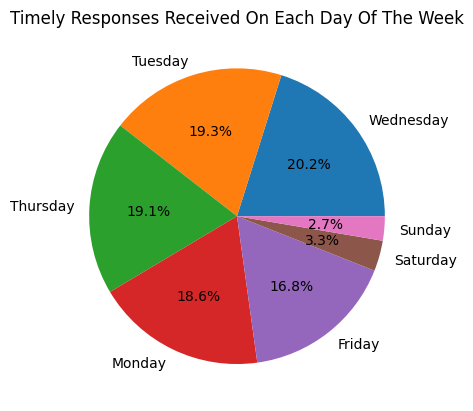

In [19]:
df['Date Sent to Company'] = pd.to_datetime(df['Date Sent to Company'])
df['Day Of Date Sent'] = df['Date Sent to Company'].dt.day_name()
timely_res_data = df[df['Timely Response'] == 'Yes']
timely_res_day = timely_res_data['Day Of Date Sent'].value_counts()
timely_res_day = timely_res_day.reset_index()

plt.pie(x = 'count', labels = 'Day Of Date Sent', data = timely_res_day, autopct = '%1.1f%%')

plt.title('Timely Responses Received On Each Day Of The Week')
plt.show()

### Proportion Of Complaints Based On Products

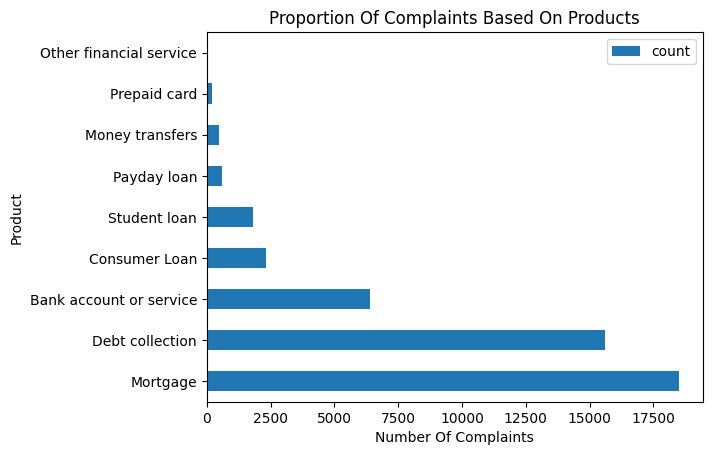

In [20]:
pro_comp = df['Product Name'].value_counts()
product_complaints = pro_comp.reset_index()

product_complaints.plot(kind = 'barh', x = 'Product Name', y = 'count')

plt.xlabel('Number Of Complaints')
plt.ylabel('Product')
plt.title('Proportion Of Complaints Based On Products')
plt.show()

### Top 10 Companies With The Most Complaints Received

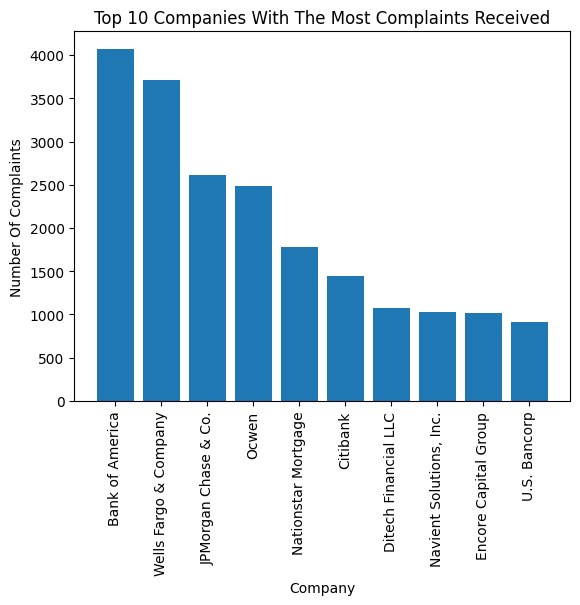

In [21]:
company_summary = df['Company'].value_counts()
company_summary = company_summary.reset_index()
company_summary.sort_values(by= 'count', ascending = False, inplace = True)
top10_comp = company_summary.head(10)

plt.bar(data = top10_comp, x = 'Company',  height = 'count')

plt.xlabel('Company')
plt.ylabel('Number Of Complaints')
plt.title('Top 10 Companies With The Most Complaints Received')
plt.xticks(rotation = 90)
plt.show()

### Number Of Complaints Made On Each Bank Of America's Products

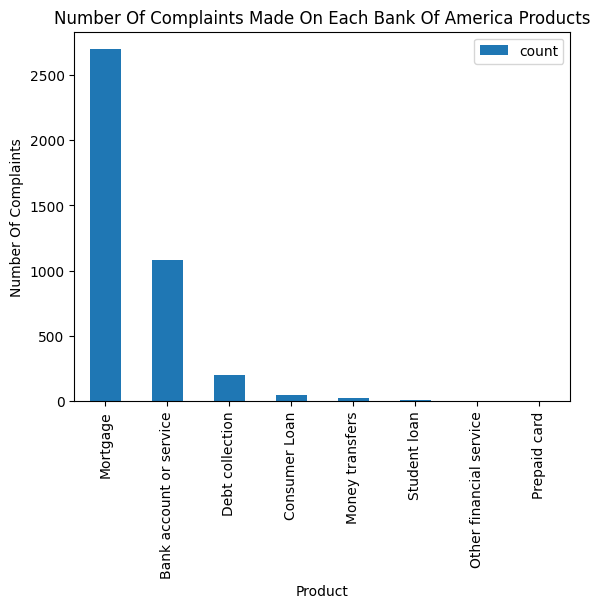

In [22]:
boa_complaints = df[df['Company'] == 'Bank of America']
boa_product_complaints = boa_complaints['Product Name'].value_counts().reset_index()

boa_product_complaints.plot(kind = 'bar', x = 'Product Name', y = 'count')
plt.xlabel('Product')
plt.ylabel('Number Of Complaints')
plt.title('Number Of Complaints Made On Each Bank Of America Products')
plt.show()

### Number Of Complaints Sent Through Each Medium

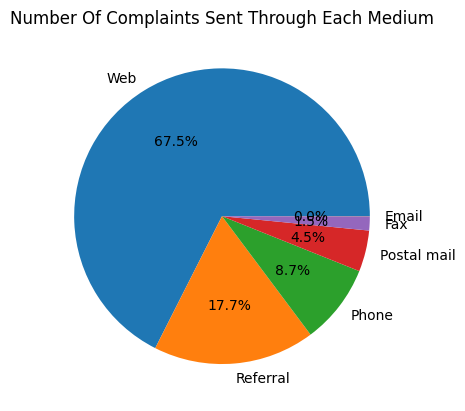

In [23]:
df_medium = df['Submitted via'].value_counts().reset_index()

plt.pie(data = df_medium, labels = 'Submitted via', x = 'count', autopct = '%1.1f%%')
plt.title('Number Of Complaints Sent Through Each Medium')
plt.show()

### Proportion Of Times Consumer Disputed and Not

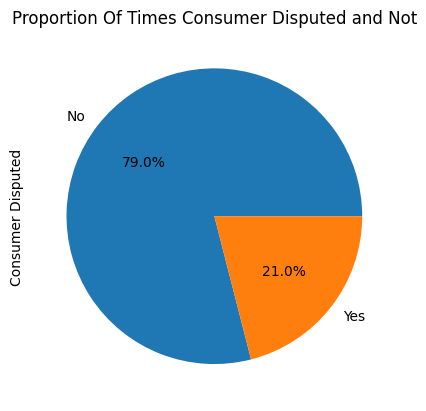

In [24]:
dispute_summary = df['Consumer Disputed'].value_counts()

dispute_summary.plot(kind = 'pie',label = 'Consumer Disputed', y = 'count', autopct = '%1.1f%%')
plt.title('Proportion Of Times Consumer Disputed and Not')
plt.show()

### Correlation Between Dispute Occurence and Timely Response

/tmp/ipykernel_18/2962494862.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dispute_timely_numeric = df[['Consumer Disputed','Timely Response']].applymap(lambda x: 1 if x == 'Yes' else 0)


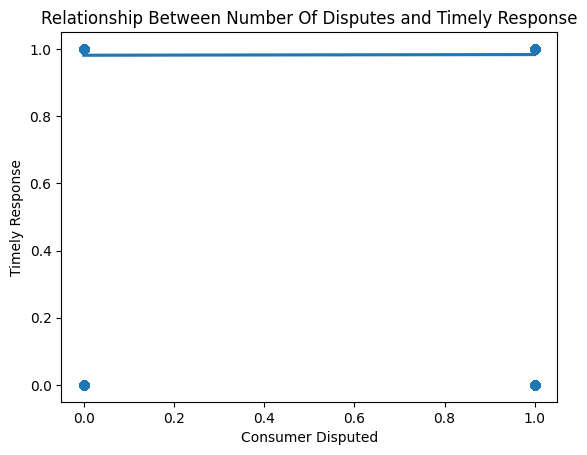

In [25]:
dispute_timely_numeric = df[['Consumer Disputed','Timely Response']].applymap(lambda x: 1 if x == 'Yes' else 0)
sns.regplot(x = 'Consumer Disputed', y = 'Timely Response', data = dispute_timely_numeric, logistic = True)

plt.xlabel('Consumer Disputed')
plt.ylabel('Timely Response')
plt.title('Relationship Between Number Of Disputes and Timely Response')
plt.show()